In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow as tf 
from tensorflow.keras.datasets import mnist 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 
from tensorflow.keras.utils import to_categorical

In [2]:
import tensorflow as tf
print(tf.__version__)

2.11.0


In [3]:
feature_vector_length = 784 
num_classes = 10 
(X_train, Y_train), (X_test, Y_test) = mnist.load_data() 
input_shape = (feature_vector_length,)
print(f'Feature shape: {input_shape}')

Feature shape: (784,)


In [4]:
X_train = X_train.reshape(X_train.shape[0], feature_vector_length) 
X_test = X_test.reshape(X_test.shape[0], feature_vector_length) 
X_train = X_train.astype('float32') / 255 
X_test = X_test.astype('float32') / 255 
Y_train = to_categorical(Y_train, num_classes) 
Y_test = to_categorical(Y_test, num_classes) 

In [5]:
model = Sequential() 
model.add(Dense(350, input_shape=input_shape, activation='relu')) 
model.add(Dense(50, activation='relu')) 
model.add(Dense(num_classes, activation='softmax')) 

In [6]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.fit(X_train, Y_train, epochs=10, batch_size=250, verbose=1, validation_split=0.2)

Epoch 1/10
192/192 [==============================] - 5s 18ms/step - loss: 0.3931 - accuracy: 0.8894 - val_loss: 0.1863 - val_accuracy: 0.9475
Epoch 2/10
192/192 [==============================] - 3s 17ms/step - loss: 0.1475 - accuracy: 0.9570 - val_loss: 0.1277 - val_accuracy: 0.9638
Epoch 3/10
192/192 [==============================] - 4s 19ms/step - loss: 0.0999 - accuracy: 0.9706 - val_loss: 0.1093 - val_accuracy: 0.9678
Epoch 4/10
192/192 [==============================] - 4s 19ms/step - loss: 0.0722 - accuracy: 0.9787 - val_loss: 0.0970 - val_accuracy: 0.9724
Epoch 5/10
192/192 [==============================] - 3s 17ms/step - loss: 0.0547 - accuracy: 0.9836 - val_loss: 0.0931 - val_accuracy: 0.9722
Epoch 6/10
192/192 [==============================] - 3s 17ms/step - loss: 0.0426 - accuracy: 0.9878 - val_loss: 0.0887 - val_accuracy: 0.9739
Epoch 7/10
192/192 [==============================] - 4s 19ms/step - loss: 0.0319 - accuracy: 0.9908 - val_loss: 0.0851 - val_accuracy: 0.9759

In [7]:
test_results = model.evaluate(X_test, Y_test, verbose=1) 
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}') 

313/313 [==============================] - 1s 3ms/step - loss: 0.0720 - accuracy: 0.9788
Test results - Loss: 0.07196743041276932 - Accuracy: 0.9787999987602234


In [8]:
predictions = model.predict(X_test[:5]) 
predicted_classes = np.argmax(predictions, axis=1) 
true_classes = np.argmax(Y_test[:5], axis=1)

1/1 [==============================] - 0s 323ms/step


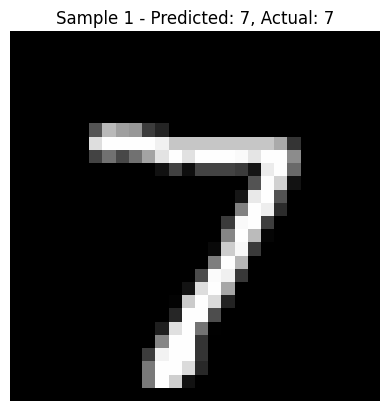

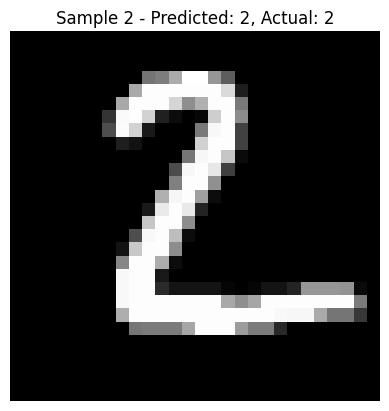

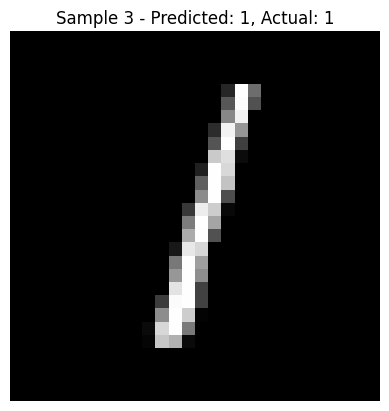

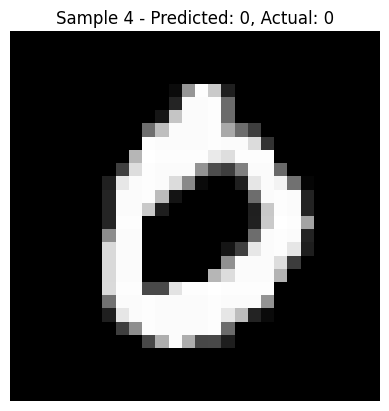

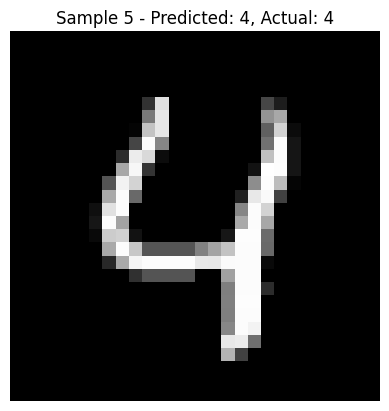

In [13]:
for i in range(5): 
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray') 
    plt.title(f"Sample {i+1} - Predicted: {predicted_classes[i]}, Actual: {true_classes[i]}") 
    plt.axis('off') 
    plt.show()